In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import NearestNeighbors
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [3]:
data = pd.read_csv('genres_v2.csv')

/var/folders/dz/bpp_dm9s3_g6qc8gr0qh4jf40000gn/T/ipykernel_56202/2411600261.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('genres_v2.csv')


In [4]:
# Preprocessing the data
# Assuming 'genre' as the target variable for classification
X = data.select_dtypes(include=['float64', 'int64']).dropna()  # Selecting numerical features
y = data.loc[X.index, 'genre']  # Corresponding genres

In [5]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
def get_recommendations(input_song, metric):
    input_index = data[data['song_name'] == input_song].index[0]

    input_features = X.iloc[input_index]
    input_features = input_features.values.reshape(1, -1)
    nn = NearestNeighbors(n_neighbors=6, metric=metric)
    nn.fit(X)
    distances, indices = nn.kneighbors(input_features)
    nearest_neighbors = indices[0]

    recommended_songs = data.iloc[nearest_neighbors]['song_name']
    
    recommendations = recommended_songs[recommended_songs != input_song].tolist()
    return recommendations


In [19]:
# Test recommendations

metrics = ['euclidean', 'manhattan', 'cosine', 'minkowski']
input_song = 'XO Tour Llif3'  # Replace with a valid song name

# Generate recommendations for each metric
recommendations_by_metric = {}
for metric in metrics:
    recommendations = get_recommendations(input_song, metric)
    recommendations_by_metric[metric] = recommendations
    print('Recommendations for', input, 'using', metric, 'distance metric:')
    print(recommendations_by_metric[metric])


Recommendations for <bound method Kernel.raw_input of <ipykernel.ipkernel.IPythonKernel object at 0x103aad850>> using euclidean distance metric:
['Pyro (leak 2019)', "Don't Bang My Line (feat. Night Lovell)", 'Mud', 'Fractals', 'Atlantis']
Recommendations for <bound method Kernel.raw_input of <ipykernel.ipkernel.IPythonKernel object at 0x103aad850>> using manhattan distance metric:
['Pyro (leak 2019)', "Don't Bang My Line (feat. Night Lovell)", 'Mud', 'Anchus Definy', 'Fractals']
Recommendations for <bound method Kernel.raw_input of <ipykernel.ipkernel.IPythonKernel object at 0x103aad850>> using cosine distance metric:
['I duckinf hatw you', 'Better Now', 'Sarcophagus (feat. $Uicideboy$)', 'shiver', 'Rambo']
Recommendations for <bound method Kernel.raw_input of <ipykernel.ipkernel.IPythonKernel object at 0x103aad850>> using minkowski distance metric:
['Pyro (leak 2019)', "Don't Bang My Line (feat. Night Lovell)", 'Mud', 'Fractals', 'Atlantis']


/Users/vedeshy/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/vedeshy/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/vedeshy/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/vedeshy/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


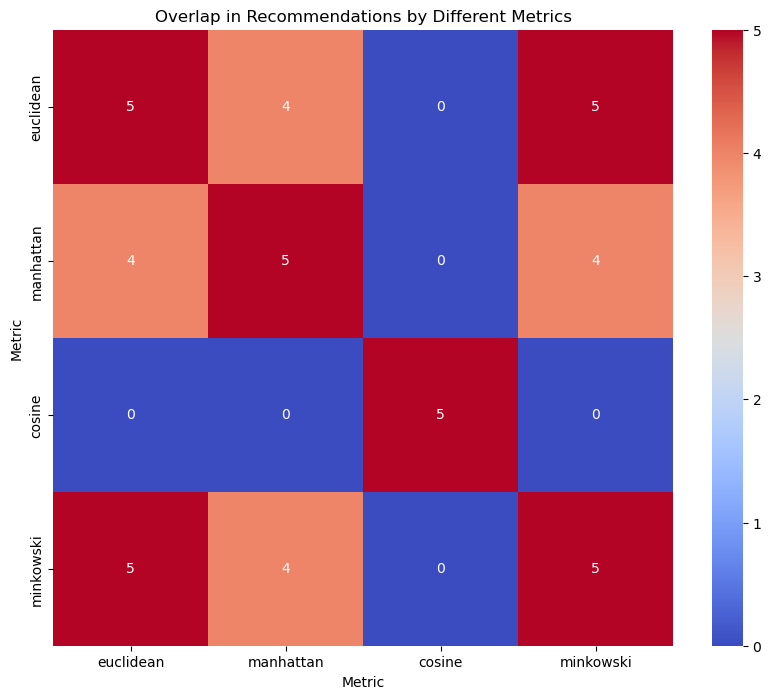

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# counting overlaps between recommendations of different metrics
overlap_matrix = {metric: [len(set(recommendations_by_metric[metric]) & set(recommendations_by_metric[m])) for m in metrics] for metric in metrics}

# convert to DataFrame for visualization
overlap_df = pd.DataFrame(overlap_matrix, index=metrics)

# heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(overlap_df, annot=True, cmap='coolwarm')
plt.title('Overlap in Recommendations by Different Metrics')
plt.xlabel('Metric')
plt.ylabel('Metric')
plt.show()


In [16]:
# Calculate intra-list similarity for recommendations
def calculate_intra_list_similarity(recommendations):
    # Fetching the indices of the recommended songs
    indices = []
    for song in recommendations:
        indices.append(data[data['song_name'] == song].index[0])
    # Calculating the intra-list similarity
    similarity = 0
    for i in range(len(indices)):
        for j in range(i+1, len(indices)):
            nameOfSong1 = data.iloc[indices[i]]['song_name']
            nameOfSong2 = data.iloc[indices[j]]['song_name']
            similarity += cosine_similarity(X.iloc[indices[i]].values.reshape(1, -1), X.iloc[indices[j]].values.reshape(1, -1))[0][0]
            #print("Similarity between ", nameOfSong1, " and ", nameOfSong2, " is ", cosine_similarity(X.iloc[indices[i]].values.reshape(1, -1), X.iloc[indices[j]].values.reshape(1, -1))[0][0])
    return similarity / (len(indices) * (len(indices) - 1) / 2)
       

In [17]:
# calculate intra-list similarity for song recommendations
for r in recommendations_by_metric:
    print('For', r)
    intraListSimilarity = calculate_intra_list_similarity(recommendations_by_metric[r])
    print("Intra-list similarity for song recommendations: ", intraListSimilarity)
    print('________________________')


For euclidean
Intra-list similarity for song recommendations:  0.9999996332844858
________________________
For manhattan
Intra-list similarity for song recommendations:  0.9999995735656626
________________________
For cosine
Intra-list similarity for song recommendations:  0.9999999988248943
________________________
For minkowski
Intra-list similarity for song recommendations:  0.9999996332844858
________________________


Skipping song at index 80 due to KeyError
Skipping song at index 293 due to KeyError
Skipping song at index 425 due to KeyError
Skipping song at index 488 due to KeyError
Skipping song at index 579 due to KeyError
Skipping song at index 668 due to KeyError
Skipping song at index 693 due to KeyError
Skipping song at index 700 due to KeyError
Skipping song at index 710 due to KeyError
Skipping song at index 835 due to KeyError
Skipping song at index 854 due to KeyError
Skipping song at index 865 due to KeyError
Skipping song at index 906 due to KeyError
Skipping song at index 916 due to KeyError
Skipping song at index 980 due to KeyError
Skipping song at index 983 due to KeyError
Skipping song at index 1047 due to KeyError
Skipping song at index 1075 due to KeyError
Skipping song at index 1097 due to KeyError
Skipping song at index 1336 due to KeyError
Skipping song at index 1365 due to KeyError
Skipping song at index 1378 due to KeyError
Skipping song at index 1398 due to KeyError
Skipp

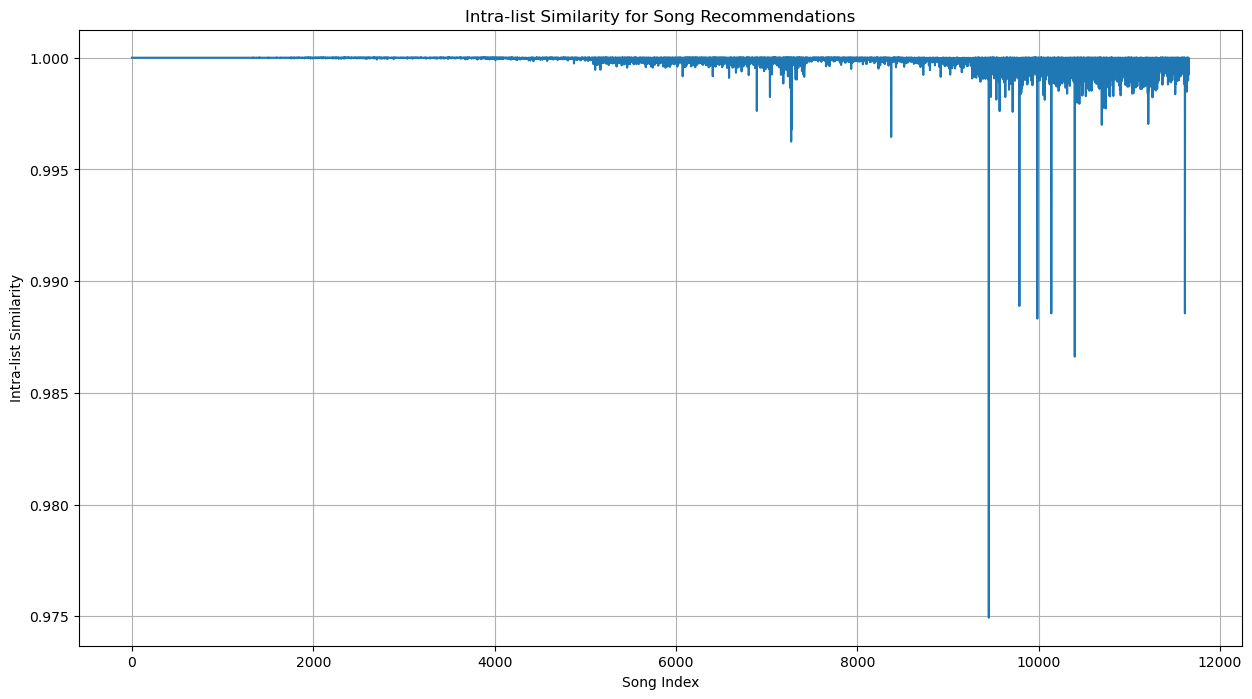

In [21]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv('genres_v2.csv')
df_unique_songs = df.drop_duplicates(subset='song_name', keep='first')


intraListSimilarities = []
for i in range(0, len(df_unique_songs)):
    try:
        recommendations = get_recommendations(df_unique_songs['song_name'][i], 'cosine')
        currIntraListSimilarity = calculate_intra_list_similarity(recommendations)
        intraListSimilarities.append(currIntraListSimilarity)
        #print("Intra-list similarity for song recommendations for song", df_unique_songs['song_name'][i], ":", currIntraListSimilarity)
    except KeyError:
        print("Skipping song at index", i, "due to KeyError")

# create visualization for intra-list similarities
plt.figure(figsize=(15, 8))
plt.plot(intraListSimilarities)
plt.title('Intra-list Similarity for Song Recommendations')
plt.xlabel('Song Index')
plt.ylabel('Intra-list Similarity')
plt.grid(True)
plt.show()
